# Titanic- machine Learning from Disaster

Using machine learning to create a model that predicts which passengers survived the Titanic wreck


In [1]:
#Library imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the data sets

In [2]:
train = pd.read_csv('Data/train.csv', )
test = pd.read_csv('Data/test.csv')

#### Overview of what the dataframes contains

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Data dictionary
- PassengerId : Unique Id of a passengers
- Survived : Survival of thos who boarded the ship
- pClass : Ticket class
- Name : Name of a passenger
- Sex: Sex
- Age: Age in years
- sibsp : sibling / spouses aboard the Titanic
- parch: parent/ children aboard the Titanic
- fare: passenger fare
- cabin: cabin number
- embarked: port of embarkation

##### train dataframe

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##### Test dataframe

In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
test.shape

(418, 11)

In [11]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Data cleaning and data visualization

In [13]:
#combining the train and test dataframes using pandas
train_test_df = pd.concat([train,test])

In [14]:
train_test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# columns in the dataframes
train_test_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [16]:
# shape of the dataframe
train_test_df.shape

(1309, 12)

In [17]:
#Checking on the datatypes
train_test_df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##### Checking missing values

In [18]:
# checking on the null values in the dataframe and their percentage
total =train_test_df.isnull().sum().sort_values(ascending =False)
percentage= round((train_test_df.isnull().sum() / train_test_df.isnull().count()*100),1).sort_values(ascending=False)
missing= pd.concat([total,percentage],axis=1, keys=['Total','percentage'])
missing


,Total,percentage
Cabin,1014,77.5
Survived,418,31.9
Age,263,20.1
Embarked,2,0.2
Fare,1,0.1
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0


The mising values from the 'Survived' feature come from the test dataframe and we do not need to tamper with it right now since it the 'Target' variable.
Embarked is only missing 2 values which can be filled easily, 'Age' feature has almost 177 features missing and this can be hard to deal with,'Cabin' also has a high percentage of missing values. I consider droping the 'Age' and 'Cabin' feature

In [19]:
col = train_test_df.columns[:]
colours = ['#000099','#ffff00']

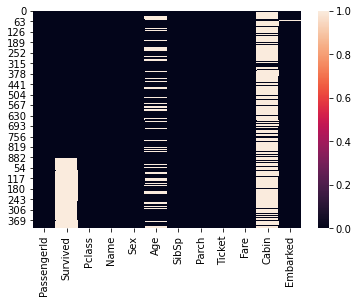

In [20]:
# visualizing the missing values using heatmaps
sns.heatmap(train_test_df[col].isnull())
plt.show()

In [21]:
# missing data percentage list
for col in train_test_df.columns:
    missing_pct = np.mean(train_test_df[col].isnull().sort_values(ascending=False))
    print('{} - {}%'.format(col,round(missing_pct*100)))

PassengerId - 0%
Survived - 32%
Pclass - 0%
Name - 0%
Sex - 0%
Age - 20%
SibSp - 0%
Parch - 0%
Ticket - 0%
Fare - 0%
Cabin - 77%
Embarked - 0%


##### Checking on the duplicate values and unique values

In [22]:
# checking on the number of unique values in a dataframe
train_test_df.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [23]:
#cheking on the number of duplicate values in the dataframe
train_test_df.duplicated().sum()

0

##### visualizing the features

###### Univariate analysis

In [24]:
train_test_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##### Numeric features

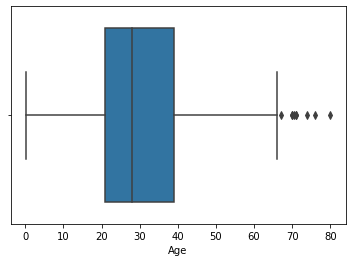

In [25]:
# Age feature
sns.boxplot(x=train_test_df.Age.dropna())
plt.show()

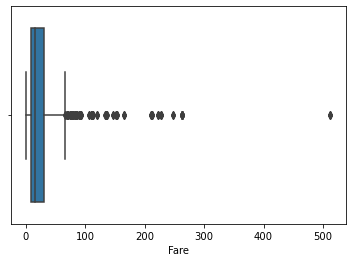

In [26]:
sns.boxplot(x=train_test_df.Fare.dropna())
plt.show()

##### Categorical features

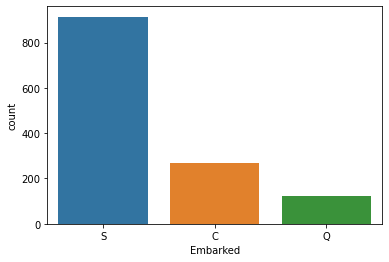

In [27]:
# visualisation of Embarked feature
sns.countplot(x='Embarked',data= train_test_df)
plt.show()

Large number of passengers boarded the Titanic at  port S, a relatively lower number was at port C and the lowest number of passengers boarded at Q

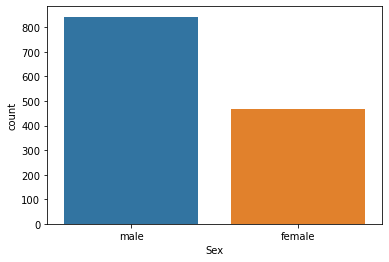

In [28]:
sns.countplot(x='Sex',data= train_test_df)
plt.show()

The number of male who boarded the Titanic was higher than those of female

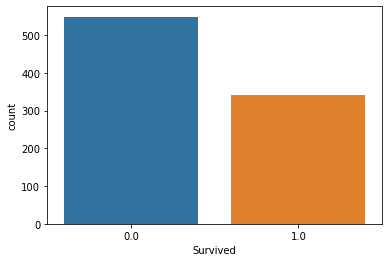

In [29]:
sns.countplot(x='Survived', data= train_test_df)
plt.show()

A large number of passengers did not survive

##### Multivariate Analysis

- Age and Sex:

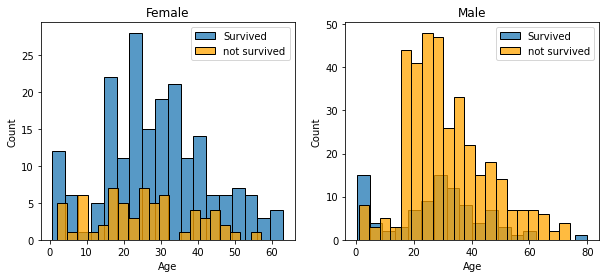

In [30]:
survived = 'Survived'
not_survived = 'not survived'

# a dataframe containing only female
female = train_test_df[train_test_df['Sex']=='female']
# a dataframe containing only male
male = train_test_df[train_test_df['Sex']=='male']

# defining the subplots 
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# plot of female survivors and non survivors
ax = sns.histplot(female[female['Survived']==1].Age.dropna(),
                  bins=18,label=survived,ax=axes[0],kde=False)
ax = sns.histplot(female[female['Survived']==0].Age.dropna(),
                  bins=20,label=not_survived,ax=axes[0],kde=False,color='orange')
ax.set_title('Female')
ax.legend()
# plot of female survivors and non survivors
ax = sns.histplot(male[male['Survived']==1].Age.dropna(),
                  bins=18,label=survived,ax=axes[1],kde=False)
ax = sns.histplot(male[male['Survived']==0].Age.dropna(),
                  bins=20,label=not_survived,ax=axes[1],kde=False,color='orange')
ax.set_title('Male')
ax.legend()

plt.show()


There was high chances of survival for female between the age of 14 and 40.
For the male probability of survival was fairly low since the number of those who survived is lower than those who did not survive.
Infants on the hand had a high chance of survival for both male and female infants

##### Embarked, Pclass and Sex

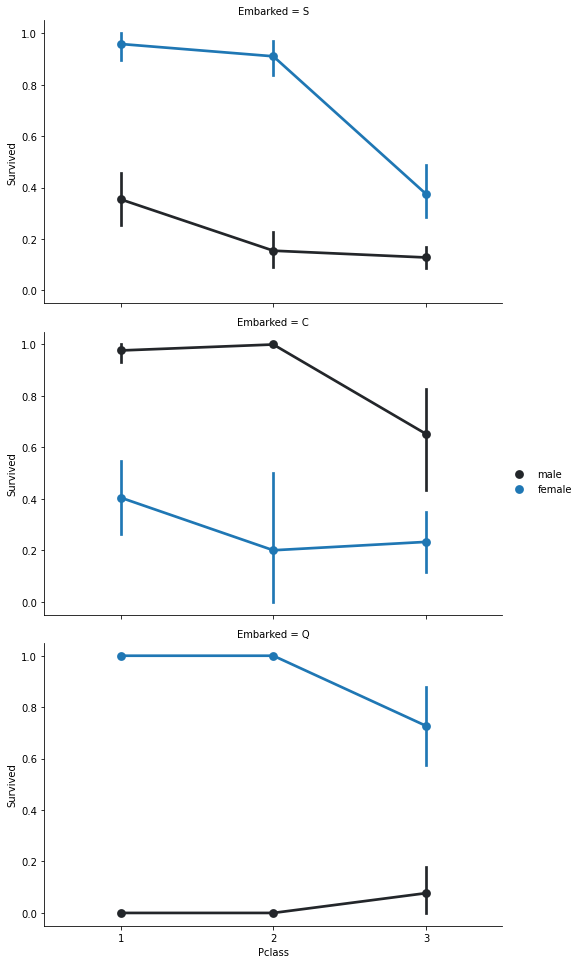

In [31]:
facetGrid = sns.FacetGrid(train_test_df, row="Embarked", height=4.5, aspect=1.6)
facetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
facetGrid.add_legend()

Embarked seems to be correlated with survival, depending on the gender.
Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

##### pclass

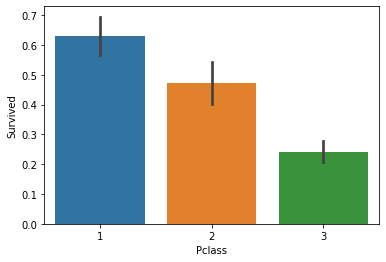

In [32]:
sns.barplot(x='Pclass', y='Survived', data=train_test_df)
plt.show()

##### Data cleaning

In [33]:
#features in our data set
train_test_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
# dropped the uncessary columns
train_test_df.drop(['Ticket','Fare','PassengerId','Name','Cabin'], inplace =True, axis=1)

In [35]:
# checking on the remaining columns
train_test_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [36]:
# Filling the null values in the age feature with the median of the age
train_test_df.Age.fillna(int(train_test_df.Age.median()), inplace=True)

In [37]:
# count of null values in the Age feature
train_test_df.Age.isnull().sum()

0

In [38]:
# missing data percentage list
for col in train_test_df.columns:
    missing_pct = np.mean(train_test_df[col].isnull().sort_values(ascending=False))
    print('{} - {}%'.format(col,round(missing_pct*100)))

Survived - 32%
Pclass - 0%
Sex - 0%
Age - 0%
SibSp - 0%
Parch - 0%
Embarked - 0%


In [42]:
# converting 'Sex' feature into numeric
gender = {"male":0,"female":1}

train_test_df["Sex"] = train_test_df["Sex"].map(gender)

In [43]:
# converting 'Embarked' feature into numeric 
ports = {"S":0,"C":1,"Q":2}
train_test_df["Embarked"] = train_test_df["Embarked"].map(ports)